In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Extracting the cleaned_apps dataset
data=pd.read_csv("Cleaned_apps_data.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##Our main objective in this analysis:

Explore this dataset
Here are some ideas to get your started with your analysis...

🗺️ Explore: Which categories get the highest reviews from amongst the 10 most popular categories?

In [9]:
data["Rating"].dtypes

dtype('float64')

In [11]:
data["Reviews"].dtypes

dtype('int64')

In [13]:
data["Installs"].dtypes

dtype('O')

In [6]:
#To explore the 10 most popular categories we need to sum the total installs
#Installs columns must be in integer type
data["Installs"]=(data["Installs"].str.replace("+", "", regex=False).str.replace(",", "", regex=False).astype(int))

In [25]:
data["Installs"].dtypes

dtype('int32')

In [27]:
data["Installs"].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [8]:
#Now we can group the TOP 10 categories by installs volume
Categories_installs=(data.groupby("Category")["Installs"].sum().reset_index())
Categories_installs.head(10)

,Category,Installs
0,ART_AND_DESIGN,124333100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1921468576
4,BUSINESS,1001914865
5,COMICS,56086150
6,COMMUNICATION,32647276251
7,DATING,264310807
8,EDUCATION,871452000
9,ENTERTAINMENT,2869160000


In [10]:
TOP_10_Categories=Categories_installs.sort_values(by="Installs",ascending=False).head(10).reset_index().drop(["index"],axis=1)

In [12]:
TOP_10_Categories

,Category,Installs
0,GAME,35086024415
1,COMMUNICATION,32647276251
2,PRODUCTIVITY,14176091369
3,SOCIAL,14069867902
4,TOOLS,11452271905
5,FAMILY,10258203405
6,PHOTOGRAPHY,10088247655
7,NEWS_AND_MAGAZINES,7496317760
8,TRAVEL_AND_LOCAL,6868887146
9,VIDEO_PLAYERS,6222002720


This dataframe shows the most popular apps categories having highest installs volume

In [14]:
#Checking TOP_10 Categories data
filtered_data=data[data["Category"].isin(TOP_10_Categories["Category"])]

# Aggregate reviews
category_reviews = (filtered_data.groupby("Category")["Reviews"].sum().reset_index())

# Sort by reviews
category_reviews_sorted = category_reviews.sort_values(by="Reviews", ascending=False).reset_index().drop(["index"],axis=1)

category_reviews_sorted

,Category,Reviews
0,GAME,1585422349
1,COMMUNICATION,815462260
2,SOCIAL,621241422
3,FAMILY,410226107
4,TOOLS,273181033
5,PHOTOGRAPHY,213516650
6,PRODUCTIVITY,114116975
7,VIDEO_PLAYERS,110380188
8,TRAVEL_AND_LOCAL,62617919
9,NEWS_AND_MAGAZINES,54400863


This dataframe shows the TOP 10 Categories having the heighest number of engagement (reviews)

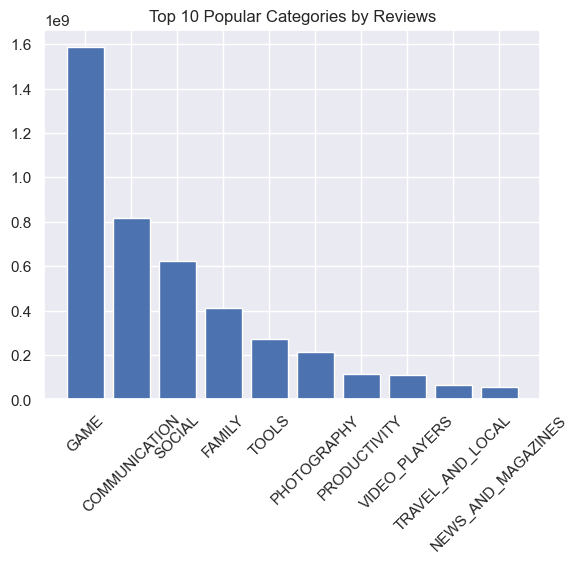

In [16]:
plt.figure()
plt.bar(category_reviews_sorted["Category"],
        category_reviews_sorted["Reviews"])
plt.xticks(rotation=45)
plt.title("Top 10 Popular Categories by Reviews")
plt.show()

In [18]:
#saving dataframes
TOP_10_Categories.to_csv("TOP10_Categories_by_Installs.csv")
category_reviews_sorted.to_csv("TOP10_Categories_by_Reviews.csv")

📊 Visualize: Create a plot visualizing the distribution of sentiment polarity, split by content rating.

In [20]:
#inporting the cleaned_reviews dataset
reviews=pd.read_csv("Cleaned_reviews.csv")
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300
4,10 Best Foods for You,Best way,Positive,1.00,0.300


In [22]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
#We need to merg the two datasets to show link the sentiments with the ratings of apps
merged_data=reviews.merge(data[["App","Content Rating","Rating"]],on="App",how="left")
merged_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Content Rating,Rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533,Everyone 10+,4.0
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533,Everyone 10+,4.0
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288,Everyone 10+,4.0
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288,Everyone 10+,4.0
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875,Everyone 10+,4.0


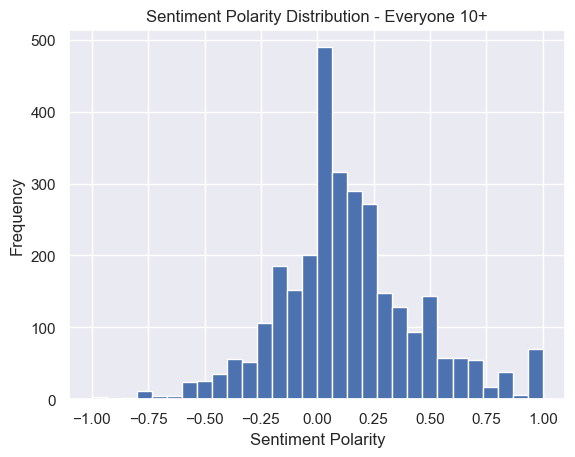

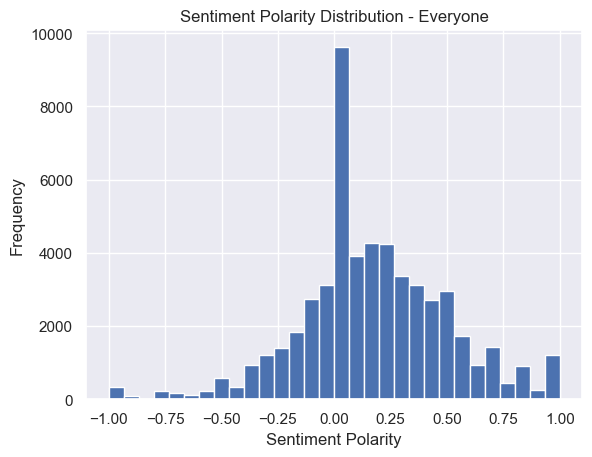

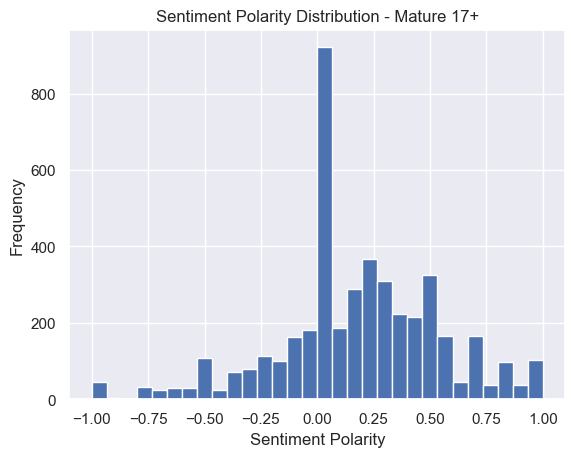

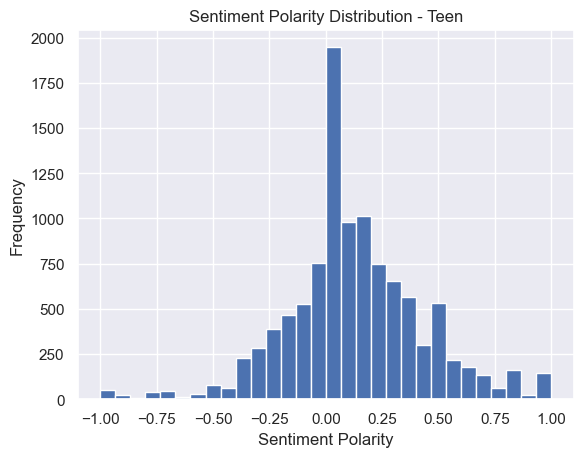

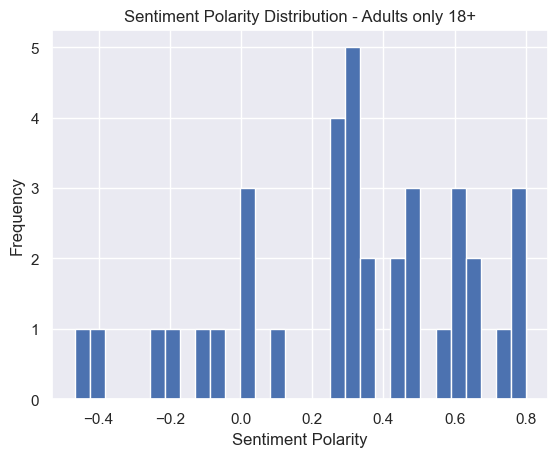

In [33]:
# Get unique content ratings
ratings = merged_data["Content Rating"].dropna().unique()

for content in ratings:
    subset = merged_data[merged_data["Content Rating"] == content]
    
    plt.figure()
    plt.hist(subset["Sentiment_Polarity"], bins=30)
    plt.title(f"Sentiment Polarity Distribution - {content}")
    plt.xlabel("Sentiment Polarity")
    plt.ylabel("Frequency")
    plt.show()

🔎 Analyze: What impact does the content rating an app receives have on its sentiment and rating?

In [35]:
impact_analysis = (
    merged_data
    .groupby("Content Rating")
    .agg({
        "Sentiment_Polarity": "mean",
        "Sentiment_Subjectivity": "mean",
        "Rating": "mean"
    })
    .reset_index()
)

impact_analysis


,Content Rating,Sentiment_Polarity,Sentiment_Subjectivity,Rating
0,Adults only 18+,0.312334,0.521361,4.500000
1,Everyone,0.164807,0.494714,4.340866
2,Everyone 10+,0.132565,0.486722,4.343651
3,Mature 17+,0.168581,0.496455,4.147567
4,Teen,0.121044,0.492876,4.371457


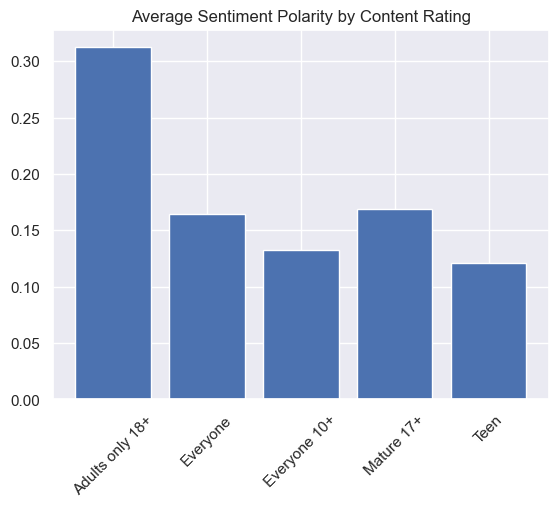

In [37]:
plt.figure()
plt.bar(impact_analysis["Content Rating"],
        impact_analysis["Sentiment_Polarity"])
plt.xticks(rotation=45)
plt.title("Average Sentiment Polarity by Content Rating")
plt.show()


## 📊 Impact of Content Rating on Sentiment and App Rating

### 1️⃣ Sentiment Polarity Distribution

The sentiment polarity distribution shows how emotionally positive or negative users are across different content rating categories.

- Apps rated **Everyone** tend to have a more centered distribution around neutral sentiment, indicating balanced user feedback.
- Apps rated **Teen** display a wider spread of polarity values, suggesting stronger emotional reactions.
- More restricted categories (e.g., Mature 17+) show higher variance in sentiment, meaning reviews are either strongly positive or strongly negative.

This suggests that the target audience influences how emotionally users express their opinions.

---

### 2️⃣ Average Sentiment vs App Rating

When comparing average sentiment polarity and average app rating:

- Categories with higher average ratings generally also show higher average sentiment polarity.
- This alignment indicates consistency between numeric ratings and written reviews.
- If discrepancies exist, it may suggest rating inflation or emotionally biased review text.

---

### 3️⃣ Business Insight

Content rating appears to influence:
- Emotional intensity of reviews
- User engagement behavior
- Perceived app quality

Apps targeting broader audiences (Everyone) receive more stable feedback,
while niche or restricted audiences generate stronger sentiment reactions.

This insight can help developers:
- Adjust marketing tone
- Improve user targeting
- Monitor sentiment trends by audience segment


### 📈 Key Takeaway

Audience segmentation significantly impacts user sentiment behavior.  
Understanding sentiment patterns by content rating allows for more targeted app improvement strategies.
